### Exploratory Data Analysis

#### libraries

In [1]:
import os

import shutil
import keras
import random
import keras_cv
import warnings
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score
from keras.utils import image_dataset_from_directory

2024-12-09 14:11:16.567804: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-09 14:11:16.569716: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 14:11:16.614385: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-09 14:11:16.616169: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-09 14:11:18.991927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Using TensorFlow backend


In [2]:
print("Is TensorFlow using the GPU?")
print(tf.test.is_gpu_available())
print("TensorFlow version:", tf.__version__)

Is TensorFlow using the GPU?
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False
TensorFlow version: 2.13.0


In [3]:
warnings.filterwarnings("ignore")

In [4]:
# Reproducability
tf.keras.utils.set_random_seed(69)

#### viewing directory

In [5]:
waste_type_dir = []

for (root, dirs, files) in os.walk('waste-images'):
    waste_type_dir.append(root)

waste_type_dir
        

['waste-images',
 'waste-images/glass_cosmetic_containers',
 'waste-images/food_waste',
 'waste-images/paper_cups',
 'waste-images/glass_food_jars',
 'waste-images/aluminum_soda_cans',
 'waste-images/eggshells',
 'waste-images/plastic_food_containers',
 'waste-images/plastic_cup_lids',
 'waste-images/magazines',
 'waste-images/newspaper',
 'waste-images/glass_beverage_bottles',
 'waste-images/plastic_water_bottles',
 'waste-images/disposable_plastic_cutlery',
 'waste-images/plastic_detergent_bottles',
 'waste-images/train',
 'waste-images/train/Mixed Recycle',
 'waste-images/train/Food Waste',
 'waste-images/train/Food Waste/.ipynb_checkpoints',
 'waste-images/train/Trash',
 'waste-images/cardboard_boxes',
 'waste-images/tea_bags',
 'waste-images/styrofoam_food_containers',
 'waste-images/aluminum_food_cans',
 'waste-images/styrofoam_cups',
 'waste-images/val',
 'waste-images/val/Mixed Recycle',
 'waste-images/val/Food Waste',
 'waste-images/val/Trash',
 'waste-images/cardboard_packagi

In [6]:
waste_type_dir = waste_type_dir[1:]

In [7]:
print(waste_type_dir)

['waste-images/glass_cosmetic_containers', 'waste-images/food_waste', 'waste-images/paper_cups', 'waste-images/glass_food_jars', 'waste-images/aluminum_soda_cans', 'waste-images/eggshells', 'waste-images/plastic_food_containers', 'waste-images/plastic_cup_lids', 'waste-images/magazines', 'waste-images/newspaper', 'waste-images/glass_beverage_bottles', 'waste-images/plastic_water_bottles', 'waste-images/disposable_plastic_cutlery', 'waste-images/plastic_detergent_bottles', 'waste-images/train', 'waste-images/train/Mixed Recycle', 'waste-images/train/Food Waste', 'waste-images/train/Food Waste/.ipynb_checkpoints', 'waste-images/train/Trash', 'waste-images/cardboard_boxes', 'waste-images/tea_bags', 'waste-images/styrofoam_food_containers', 'waste-images/aluminum_food_cans', 'waste-images/styrofoam_cups', 'waste-images/val', 'waste-images/val/Mixed Recycle', 'waste-images/val/Food Waste', 'waste-images/val/Trash', 'waste-images/cardboard_packaging', 'waste-images/plastic_soda_bottles', 'wa

### Assumption: All materials are food and beverage free
Also..talk about liquid disposal fountain next to the trash

In [8]:
food_waste = ['coffee_grounds','eggshells', 'food_waste', 'tea_bags']
mixed_recycle = ['aluminum_food_cans', 'aluminum_soda_cans', 'aerosol_cans', 'cardboard_boxes', 'cardboard_packaging','glass_beverage_bottles', 'glass_cosmetic_containers', 'glass_food_jars', 'magazines', 'newspaper', 'office_paper', 'plastic_detergent_bottles', 'plastic_food_containers', 'plastic_soda_bottles', 'plastic_water_bottles','steel_food_cans']
trash = ['clothes','styrofoam_cups', 'styrofoam_food_containers', 'disposable_plastic_cutlery', 'paper_cups', 'paper_cup_lids', 'plastic_shopping_bags','plastic_straws', 'plastic_trash_bags', 'shoes' ]

In [9]:
if len(food_waste) + len(mixed_recycle) + len(trash) == len(waste_type_dir):
    print("All categories included!")

In [10]:
# Function to map materials to their directories
def map_to_directories(materials, directories):
    return [dir_path for dir_path in directories if dir_path.split('/')[-1] in materials]

# Map each list to directories
food_waste_dirs = map_to_directories(food_waste, waste_type_dir)
mixed_recycle_dirs = map_to_directories(mixed_recycle, waste_type_dir)
trash_dirs = map_to_directories(trash, waste_type_dir)

# Print results
print("Food Waste Directories:", food_waste_dirs)
print("Mixed Recycle Directories:", mixed_recycle_dirs)
print("Trash Directories:", trash_dirs)

Food Waste Directories: ['waste-images/food_waste', 'waste-images/eggshells', 'waste-images/tea_bags', 'waste-images/coffee_grounds']
Mixed Recycle Directories: ['waste-images/glass_cosmetic_containers', 'waste-images/glass_food_jars', 'waste-images/aluminum_soda_cans', 'waste-images/plastic_food_containers', 'waste-images/magazines', 'waste-images/newspaper', 'waste-images/glass_beverage_bottles', 'waste-images/plastic_water_bottles', 'waste-images/plastic_detergent_bottles', 'waste-images/cardboard_boxes', 'waste-images/aluminum_food_cans', 'waste-images/cardboard_packaging', 'waste-images/plastic_soda_bottles', 'waste-images/office_paper', 'waste-images/aerosol_cans', 'waste-images/steel_food_cans']
Trash Directories: ['waste-images/paper_cups', 'waste-images/disposable_plastic_cutlery', 'waste-images/styrofoam_food_containers', 'waste-images/styrofoam_cups', 'waste-images/plastic_straws', 'waste-images/plastic_trash_bags', 'waste-images/plastic_shopping_bags', 'waste-images/shoes']

In [11]:
# verify if all categories' working directory was matched
print("Food Waste: ", len(food_waste_dirs)==len(food_waste))
print("Mixed Recycling: ", len(mixed_recycle_dirs)==len(mixed_recycle))
print("Trash: ", len(trash_dirs)==len(trash_dirs))

Food Waste:  True
Mixed Recycling:  True
Trash:  True


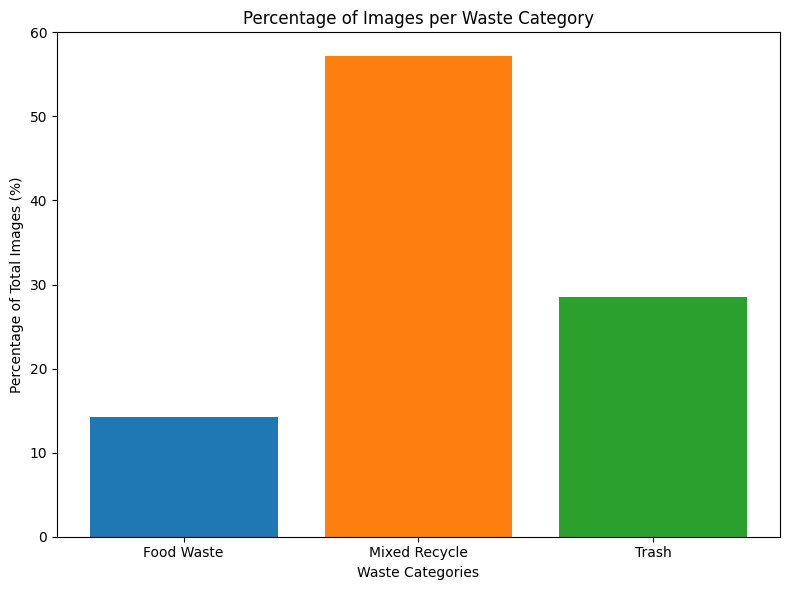

In [12]:
# Function to count total images in default and real_world subdirectories for a category
def count_total_images(category_dirs):
    total_images = 0
    for dir_path in category_dirs:

        # Count images in default and real_world subdirectories
        default_count = len([f for f in os.listdir(dir_path) if os.path.isfile(os.path.join(dir_path, f))]) if os.path.exists(dir_path) else 0
        # Add to total count
        total_images += (default_count)
    return total_images

# Calculate total image counts for each category
food_waste_total = count_total_images(food_waste_dirs)
mixed_recycle_total = count_total_images(mixed_recycle_dirs)
trash_total = count_total_images(trash_dirs)

# Calculate total images across all categories
overall_total = food_waste_total + mixed_recycle_total + trash_total

# Calculate percentages
categories = ['Food Waste', 'Mixed Recycle', 'Trash']
percentages = [
    (food_waste_total / overall_total) * 100,
    (mixed_recycle_total / overall_total) * 100,
    (trash_total / overall_total) * 100
]

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.xlabel('Waste Categories')
plt.ylabel('Percentage of Total Images (%)')
plt.title('Percentage of Images per Waste Category')
plt.tight_layout()
plt.show()

### Using GANs to Create Synthetic Food Waste Images 

In [13]:
# Preprocessing function to load and resize images
def load_images_from_dirs(dirs, image_size=(64, 64)):
    images = []
    for dir_path in dirs:
        for img_file in os.listdir(dir_path):
            img_path = os.path.join(dir_path, img_file)
            try:
                img = Image.open(img_path).convert("RGB")  # Ensure all images are RGB
                img = img.resize(image_size)  # Resize to target size
                images.append(np.array(img))
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
    return np.array(images)
# Load images for each category
food_waste_images = load_images_from_dirs(food_waste_dirs)
mixed_recycle_images = load_images_from_dirs(mixed_recycle_dirs)
trash_images = load_images_from_dirs(trash_dirs)

# Normalize image data (-1 to 1 range) because we are using Tanh activation in the last layer of the model
food_waste_images = (food_waste_images / 127.5) - 1.0
mixed_recycle_images = (mixed_recycle_images / 127.5) - 1.0
trash_images = (trash_images / 127.5) - 1.0




In [14]:
print(f"Food Waste Images Shape: {food_waste_images.shape}, dtype: {food_waste_images.dtype}")


Food Waste Images Shape: (2000, 64, 64, 3), dtype: float64


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9921568627450981..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


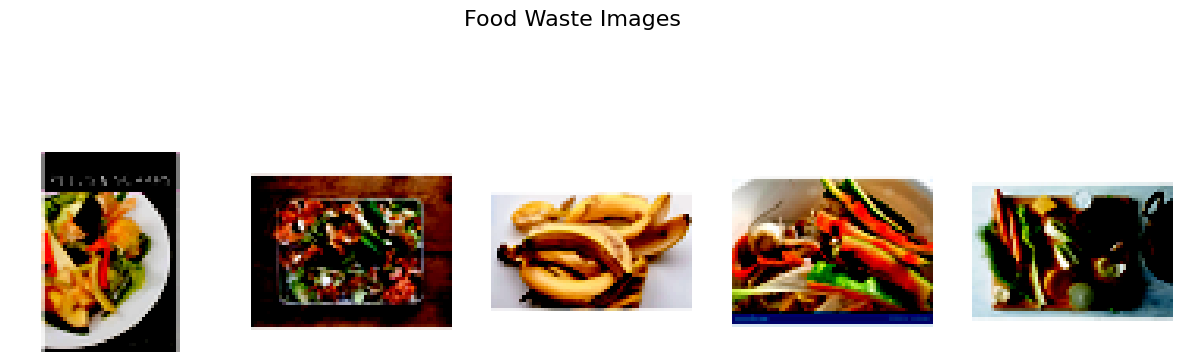

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8980392156862745..0.9294117647058824].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9843137254901961..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8666666666666667..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9058823529411765..1.0].


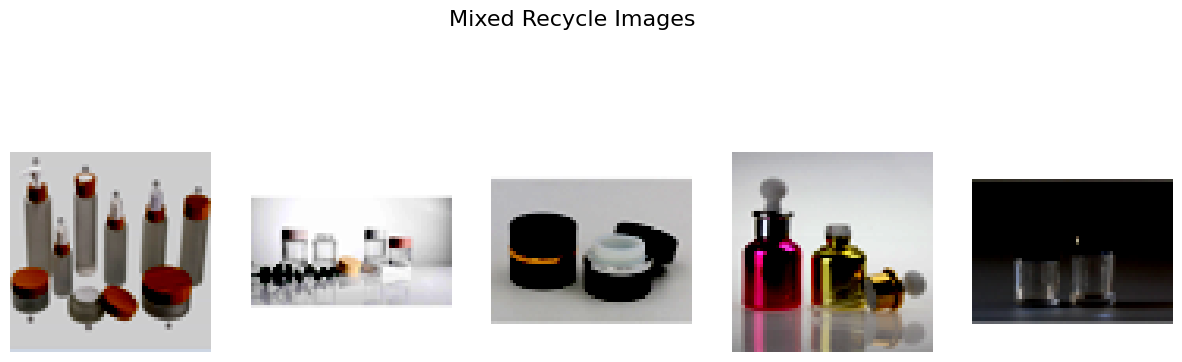

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.8666666666666667..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.33333333333333337..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7803921568627451..1.0].


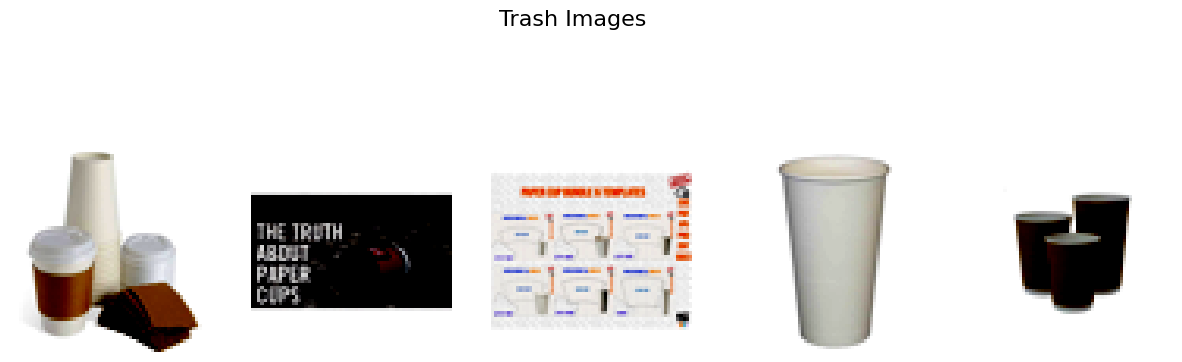

In [15]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, title, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(min(n, len(images))):
        plt.subplot(1, n, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.show()

# Show some images from each category
show_images(food_waste_images, "Food Waste Images")
show_images(mixed_recycle_images, "Mixed Recycle Images")
show_images(trash_images, "Trash Images")


# GAN Architecture: 
* Generator: 
    * What It Does: Generates synthetic images from random noise.
    * Purpose: Learns to create images that are indistinguishable from real ones.
    * Why It's Important: Produces new data for augmentation, which helps balance your dataset.Takes random noise as input and generates images.
* Discriminator: Takes real or generated images as input and predicts whether they are real or fake.
    * What It Does: Classifies images as real or fake.
    * Purpose: Helps the generator improve its ability to produce realistic images.
    * Why It's Important: Provides feedback to the generator, guiding it towards producing better images.
* GAN: Combines the generator and discriminator to train the generator to produce more realistic images.


Finished epoch 50/1000
Finished epoch 100/1000
Finished epoch 150/1000
Finished epoch 200/1000
Finished epoch 250/1000
Finished epoch 300/1000
Finished epoch 350/1000
Finished epoch 400/1000
Finished epoch 450/1000
Finished epoch 500/1000
Finished epoch 550/1000
Finished epoch 600/1000
Finished epoch 650/1000
Finished epoch 700/1000
Finished epoch 750/1000
Finished epoch 800/1000
Finished epoch 850/1000
Finished epoch 900/1000
Finished epoch 950/1000
Finished epoch 1000/1000


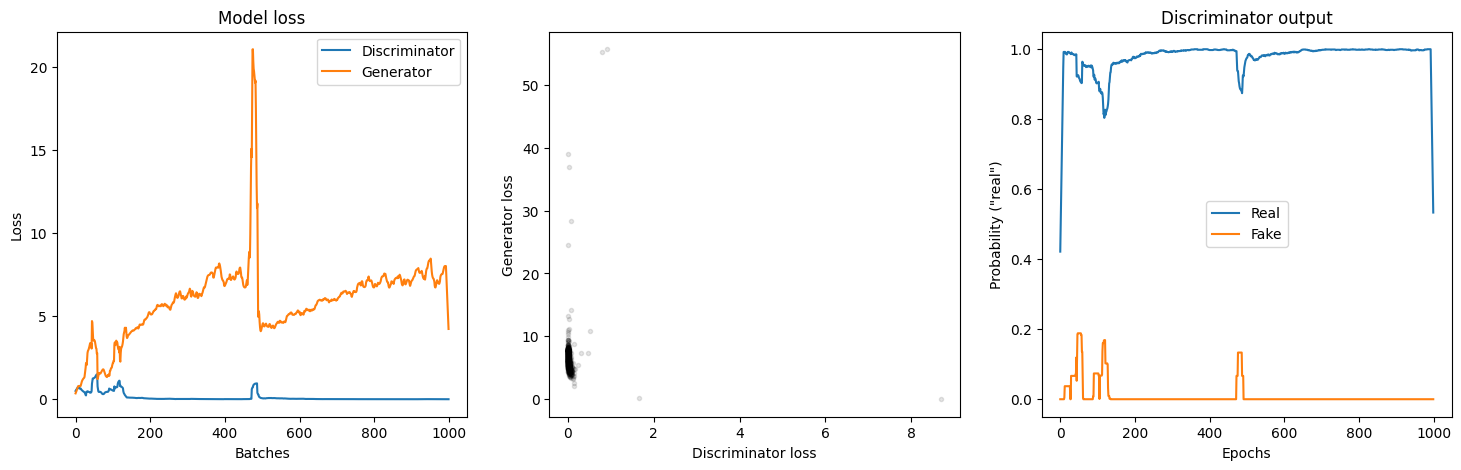

In [16]:
from tensorflow.keras import layers

# Generator Model
gnet = tf.keras.Sequential([
    layers.Dense(4 * 4 * 512, use_bias=False, input_shape=(100,)),  # Input latent vector size = 100
    layers.BatchNormalization(),
    layers.LeakyReLU(0.2),
    layers.Reshape((4, 4, 512)),  # Reshape to 4x4x512

    layers.Conv2DTranspose(256, (4, 4), strides=(2, 2), padding='same', use_bias=False),  # 8x8x256
    layers.BatchNormalization(),
    layers.LeakyReLU(0.2),

    layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding='same', use_bias=False),  # 16x16x128
    layers.BatchNormalization(),
    layers.LeakyReLU(0.2),

    layers.Conv2DTranspose(64, (4, 4), strides=(2, 2), padding='same', use_bias=False),  # 32x32x64
    layers.BatchNormalization(),
    layers.LeakyReLU(0.2),

    layers.Conv2DTranspose(3, (4, 4), strides=(2, 2), padding='same', use_bias=False, activation='tanh')  # 64x64x3 (RGB)
])

# Discriminator Model
dnet = tf.keras.Sequential([
    layers.Conv2D(64, (4, 4), strides=(2, 2), padding='same', use_bias=False, input_shape=(64, 64, 3)),  # Input 64x64x3
    layers.LeakyReLU(0.2),

    layers.Conv2D(128, (4, 4), strides=(2, 2), padding='same', use_bias=False),  # 32x32x128
    layers.BatchNormalization(),
    layers.LeakyReLU(0.2),

    layers.Conv2D(256, (4, 4), strides=(2, 2), padding='same', use_bias=False),  # 16x16x256
    layers.BatchNormalization(),
    layers.LeakyReLU(0.2),

    layers.Conv2D(512, (4, 4), strides=(2, 2), padding='same', use_bias=False),  # 8x8x512
    layers.BatchNormalization(),
    layers.LeakyReLU(0.2),

    layers.Conv2D(1, (4, 4), strides=(1, 1), padding='valid', use_bias=False),  # 1x1x1
    layers.Flatten()  # Flatten to a single value (real vs. fake)
])

# Loss Function and Optimizers
lossfun = tf.keras.losses.BinaryCrossentropy(from_logits=True)
d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Training Loop Parameters
num_epochs = 1000
batchsize = 86
losses = []
disDecs = []


for epochi in range(num_epochs):
    ridx = np.random.randint(food_waste_images.shape[0], size=batchsize)
    data = food_waste_images[ridx]
    real_labels = np.ones((batchsize, 1))
    fake_labels = np.zeros((batchsize, 1))

    with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
        # Train discriminator
        pred_real = dnet(data)  # Real images
        d_loss_real = lossfun(real_labels, pred_real)

        fake_data = np.random.randn(batchsize, 100)
        fake_images = gnet(fake_data)  # Generate fake images
        pred_fake = dnet(fake_images)  # Fake predictions
        d_loss_fake = lossfun(fake_labels, pred_fake)

        d_loss = d_loss_real + d_loss_fake

        # Train generator
        pred_generated = dnet(fake_images)  # Predictions for fake images
        g_loss = lossfun(real_labels, pred_generated)  # Fool the discriminator

    d_gradients = d_tape.gradient(d_loss, dnet.trainable_variables)
    g_gradients = g_tape.gradient(g_loss, gnet.trainable_variables)

    d_optimizer.apply_gradients(zip(d_gradients, dnet.trainable_variables))
    g_optimizer.apply_gradients(zip(g_gradients, gnet.trainable_variables))

    losses.append([d_loss.numpy(), g_loss.numpy()])
    d1 = np.mean((pred_real.numpy() > 0.5).astype(float))
    d2 = np.mean((pred_fake.numpy() > 0.5).astype(float))
    disDecs.append([d1, d2])

    if (epochi + 1) % 50 == 0:
        msg = f'Finished epoch {epochi + 1}/{num_epochs}'
        print(msg)

# Post-training: Visualize losses and discriminator outputs
losses = np.array(losses)
disDecs = np.array(disDecs)

# Plot results
def smooth(x, k=15):
    return np.convolve(x, np.ones(k) / k, mode='same')

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].plot(smooth(losses[:, 0]))
ax[0].plot(smooth(losses[:, 1]))
ax[0].set_xlabel('Batches')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend(['Discriminator', 'Generator'])

ax[1].plot(losses[200:, 0], losses[200:, 1], 'k.', alpha=.1)
ax[1].set_xlabel('Discriminator loss')
ax[1].set_ylabel('Generator loss')

ax[2].plot(smooth(disDecs[:, 0]))
ax[2].plot(smooth(disDecs[:, 1]))
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Probability ("real")')
ax[2].set_title('Discriminator output')
ax[2].legend(['Real', 'Fake'])

plt.show()

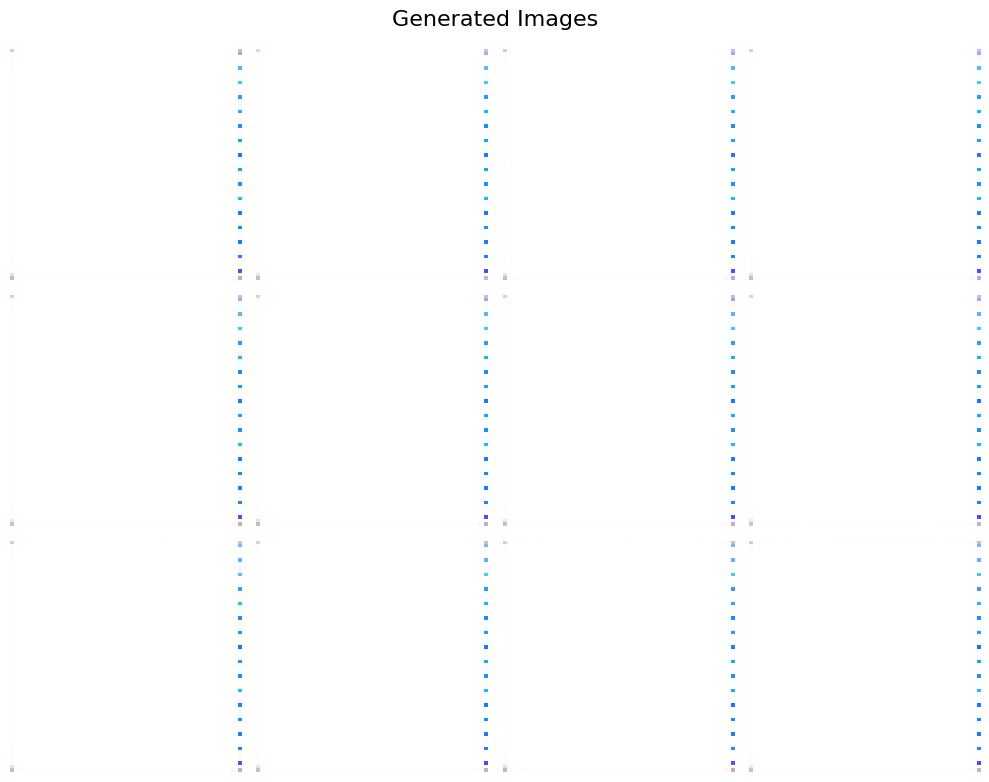

In [17]:
# Generate random noise to feed into the generator
num_images = 12  # Number of images to generate
random_noise = tf.random.normal([num_images, 100])  # Latent space (batch_size, latent_dim)

# Use the generator to create fake images
generated_images = gnet(random_noise, training=False).numpy()

# Rescale the generated images from [-1, 1] to [0, 1] for visualization
generated_images = (generated_images + 1) / 2

# Plot the generated images
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 4, figsize=(10, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(generated_images[i])  # Show RGB images
    ax.axis('off')
plt.suptitle("Generated Images", fontsize=16)
plt.tight_layout()
plt.show()


In [18]:
# # Number of epochs and batch size
# num_epochs = 50000
# batchsize = 86

# # Output directories for saving generated images and checkpoints
# output_dir = "gan_outputs_v2"
# checkpoint_dir = "gan_checkpoints_v2"
# os.makedirs(output_dir, exist_ok=True)
# os.makedirs(checkpoint_dir, exist_ok=True)

# # Training metrics
# losses = []
# disDecs = []

# for epochi in range(num_epochs):
#     # Sample real images
#     ridx = np.random.randint(food_waste_images.shape[0], size=batchsize)
#     real_images = food_waste_images[ridx]  # Replace `images` with your training dataset
#     real_labels = np.ones((batchsize, 1))
#     fake_labels = np.zeros((batchsize, 1))

#     with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
#         # Generate fake images
#         noise = tf.random.normal([batchsize, 100])
#         fake_images = gnet(noise, training=True)

#         # Discriminator predictions
#         pred_real = dnet(real_images, training=True)
#         pred_fake = dnet(fake_images, training=True)

#         # Discriminator loss
#         d_loss_real = lossfun(real_labels, pred_real)
#         d_loss_fake = lossfun(fake_labels, pred_fake)
#         d_loss = d_loss_real + d_loss_fake

#         # Generator loss
#         pred_generated = dnet(fake_images, training=True)
#         g_loss = lossfun(real_labels, pred_generated)

#     # Backpropagation
#     d_gradients = d_tape.gradient(d_loss, dnet.trainable_variables)
#     g_gradients = g_tape.gradient(g_loss, gnet.trainable_variables)

#     d_optimizer.apply_gradients(zip(d_gradients, dnet.trainable_variables))
#     g_optimizer.apply_gradients(zip(g_gradients, gnet.trainable_variables))

#     # Log metrics
#     losses.append([d_loss.numpy(), g_loss.numpy()])
#     d1 = np.mean((pred_real.numpy() > 0.5).astype(float))
#     d2 = np.mean((pred_fake.numpy() > 0.5).astype(float))
#     disDecs.append([d1, d2])

#     # Save intermediate results every 1,000 epochs
#     if (epochi + 1) % 1000 == 0:
#         noise = tf.random.normal([12, 100])  # Generate 12 random noise vectors
#         generated_images = gnet(noise, training=False).numpy()
#         generated_images = (generated_images + 1) / 2  # Rescale to [0, 1]

#         # Save generated images
#         fig, axs = plt.subplots(3, 4, figsize=(10, 8))
#         for i, ax in enumerate(axs.flatten()):
#             ax.imshow(generated_images[i])
#             ax.axis('off')
#         plt.suptitle(f"Generated Images at Epoch {epochi + 1}")
#         plt.tight_layout()
#         plt.savefig(os.path.join(output_dir, f"generated_epoch_{epochi + 1}.png"))
#         plt.close()

#         # Save model checkpoints
#         gnet.save(os.path.join(checkpoint_dir, f"generator_epoch_{epochi + 1}.h5"))
#         dnet.save(os.path.join(checkpoint_dir, f"discriminator_epoch_{epochi + 1}.h5"))

#     # Print progress every 500 epochs
#     if (epochi + 1) % 500 == 0:
#         print(f"Epoch {epochi + 1}/{num_epochs} - D Loss: {d_loss.numpy()}, G Loss: {g_loss.numpy()}")

# # Save final models
# gnet.save(os.path.join(checkpoint_dir, "generator_final.h5"))
# dnet.save(os.path.join(checkpoint_dir, "discriminator_final.h5"))

# # Generate Final Plots
# losses = np.array(losses)
# disDecs = np.array(disDecs)

# def smooth(x, k=15):
#     """Smooth a 1D array using a moving average."""
#     return np.convolve(x, np.ones(k) / k, mode='same')

# # 1. Model Loss Plot
# fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# # Losses (Left Plot)
# ax[0].plot(smooth(losses[:, 0]), label="Discriminator")
# ax[0].plot(smooth(losses[:, 1]), label="Generator")
# ax[0].set_xlabel('Batches')
# ax[0].set_ylabel('Loss')
# ax[0].set_title('Model Loss')
# ax[0].legend()

# # Generator vs. Discriminator Loss Scatter Plot (Middle Plot)
# ax[1].plot(losses[:, 0], losses[:, 1], 'k.', alpha=0.1)
# ax[1].set_xlabel('Discriminator Loss')
# ax[1].set_ylabel('Generator Loss')
# ax[1].set_title('Loss Correlation')

# # Discriminator Output Probabilities (Right Plot)
# ax[2].plot(smooth(disDecs[:, 0]), label="Real")
# ax[2].plot(smooth(disDecs[:, 1]), label="Fake")
# ax[2].set_xlabel('Epochs')
# ax[2].set_ylabel('Probability ("real")')
# ax[2].set_title('Discriminator Output')
# ax[2].legend()

# # Save and Show Final Plots
# plt.tight_layout()
# plt.savefig(os.path.join(output_dir, "final_training_plots.png"))
# plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

# Directories for output and checkpoints
output_dir = "gan_outputs_v2"
checkpoint_dir = "gan_checkpoints_v2"

# Load models from checkpoint
start_epoch = 64000
gnet = tf.keras.models.load_model(os.path.join(checkpoint_dir, f"generator_epoch_{start_epoch}.h5"))
dnet = tf.keras.models.load_model(os.path.join(checkpoint_dir, f"discriminator_epoch_{start_epoch}.h5"))

# Define the optimizers
d_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
g_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)

# Compile the discriminator
# Compilation is needed because we explicitly train the discriminator
dnet.compile(
    optimizer=d_optimizer,
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
)

# The generator doesn't require compilation since it's optimized via the discriminator
# Loss function for custom training loop
lossfun = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Number of epochs and batch size
num_epochs = 80000  # Total number of epochs
batchsize = 86

# Training metrics
losses = []
disDecs = []

# Resume training loop
for epochi in range(start_epoch, num_epochs):
    # Sample real images
    ridx = np.random.randint(food_waste_images.shape[0], size=batchsize)
    real_images = food_waste_images[ridx]  
    real_labels = np.ones((batchsize, 1))
    fake_labels = np.zeros((batchsize, 1))

    with tf.GradientTape() as d_tape, tf.GradientTape() as g_tape:
        # Generate fake images
        noise = tf.random.normal([batchsize, 100])
        fake_images = gnet(noise, training=True)

        # Discriminator predictions
        pred_real = dnet(real_images, training=True)
        pred_fake = dnet(fake_images, training=True)

        # Discriminator loss
        d_loss_real = lossfun(real_labels, pred_real)
        d_loss_fake = lossfun(fake_labels, pred_fake)
        d_loss = d_loss_real + d_loss_fake

        # Generator loss
        pred_generated = dnet(fake_images, training=True)
        g_loss = lossfun(real_labels, pred_generated)

    # Backpropagation
    d_gradients = d_tape.gradient(d_loss, dnet.trainable_variables)
    g_gradients = g_tape.gradient(g_loss, gnet.trainable_variables)

    d_optimizer.apply_gradients(zip(d_gradients, dnet.trainable_variables))
    g_optimizer.apply_gradients(zip(g_gradients, gnet.trainable_variables))

    # Log metrics
    losses.append([d_loss.numpy(), g_loss.numpy()])
    d1 = np.mean((pred_real.numpy() > 0.5).astype(float))
    d2 = np.mean((pred_fake.numpy() > 0.5).astype(float))
    disDecs.append([d1, d2])

    # Save intermediate results every 1,000 epochs
    if (epochi + 1) % 1000 == 0:
        noise = tf.random.normal([12, 100])  # Generate 12 random noise vectors
        generated_images = gnet(noise, training=False).numpy()
        generated_images = (generated_images + 1) / 2  # Rescale to [0, 1]

        # Save generated images
        fig, axs = plt.subplots(3, 4, figsize=(10, 8))
        for i, ax in enumerate(axs.flatten()):
            ax.imshow(generated_images[i])
            ax.axis('off')
        plt.suptitle(f"Generated Images at Epoch {epochi + 1}")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, f"generated_epoch_{epochi + 1}.png"))
        plt.close()

        # Save model checkpoints
        gnet.save(os.path.join(checkpoint_dir, f"generator_epoch_{epochi + 1}.h5"))
        dnet.save(os.path.join(checkpoint_dir, f"discriminator_epoch_{epochi + 1}.h5"))

    # Print progress every 500 epochs
    if (epochi + 1) % 500 == 0:
        print(f"Epoch {epochi + 1}/{num_epochs} - D Loss: {d_loss.numpy()}, G Loss: {g_loss.numpy()}")

# Save final models
gnet.save(os.path.join(checkpoint_dir, "generator_final.h5"))
dnet.save(os.path.join(checkpoint_dir, "discriminator_final.h5"))

# Generate Final Plots
losses = np.array(losses)
disDecs = np.array(disDecs)

# Define a smoothing function for the plots
def smooth(x, k=15):
    """Smooth a 1D array using a moving average."""
    return np.convolve(x, np.ones(k) / k, mode='same')

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Losses (Left Plot)
ax[0].plot(smooth(losses[:, 0]), label="Discriminator")
ax[0].plot(smooth(losses[:, 1]), label="Generator")
ax[0].set_xlabel('Batches')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model Loss')
ax[0].legend()

# Generator vs. Discriminator Loss Scatter Plot (Middle Plot)
ax[1].plot(losses[:, 0], losses[:, 1], 'k.', alpha=0.1)
ax[1].set_xlabel('Discriminator Loss')
ax[1].set_ylabel('Generator Loss')
ax[1].set_title('Loss Correlation')

# Discriminator Output Probabilities (Right Plot)
ax[2].plot(smooth(disDecs[:, 0]), label="Real")
ax[2].plot(smooth(disDecs[:, 1]), label="Fake")
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Probability ("real")')
ax[2].set_title('Discriminator Output')
ax[2].legend()

# Save and Show Final Plots
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "final_training_plots.png"))
plt.show()